<a href="https://colab.research.google.com/github/Angelina777707/-/blob/main/KLADOVA_Visualization_With_Seaborn%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matplotlib оказался невероятно полезным и популярным инструментом визуализации, но даже заядлые пользователи признают, что он часто оставляет желать лучшего. Есть несколько обоснованных жалоб на Matplotlib, которые часто возникают:

До версии 2.0 настройки Matplotlib по умолчанию не были лучшим выбором. Он был основан на MATLAB примерно 1999 года, и это часто видно.
API Matplotlib относительно низкого уровня. Сложная статистическая визуализация возможна, но часто требует большого количества шаблонного кода.
Matplotlib появился раньше Pandas более чем на десятилетие, и поэтому не предназначен для использования с Pandas DataFrames. Чтобы визуализировать данные из Pandas DataFrame, необходимо извлечь каждый из них Seriesи часто объединять их в нужный формат. Было бы лучше иметь библиотеку построения графиков, которая может разумно использовать DataFrameметки на графике.
Решением этих проблем является Seaborn . Seaborn предоставляет API поверх Matplotlib, который предлагает разумный выбор стилей графиков и цветов по умолчанию, определяет простые высокоуровневые функции для распространенных типов статистических графиков и интегрируется с функциональностью, предоставляемой Pandas DataFrame.

Справедливости ради, команда Matplotlib решает эту проблему: недавно она добавила plt.styleинструменты, обсуждаемые в разделе Настройка Matplotlib: конфигурации и таблицы стилей , и начинает обрабатывать данные Pandas более гладко. Версия 2.0 библиотеки будет включать новую таблицу стилей по умолчанию, которая улучшит текущий статус-кво. Но по всем причинам, которые только что обсуждались, Seaborn остается чрезвычайно полезным дополнением.

# Seaborn против Matplotlib
Вот пример простого графика случайного блуждания в Matplotlib, использующего его классическое форматирование и цвета. Начнем с типичного импорта:

In [ ]:
import matplotlib.pyplot as plt # этот код подготавливает среду Python для анализа данных, визуализации и интерактивной работы с графиками в блокноте.
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Теперь создадим некоторые случайные данные:

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
#Данные, сгенерированные этим кодом, часто используются для демонстрации возможностей визуализации matplotlib, в частности, для построения графиков с несколькими линиями, графиков временных рядов или случайных процессов.


И сделаем простой график:

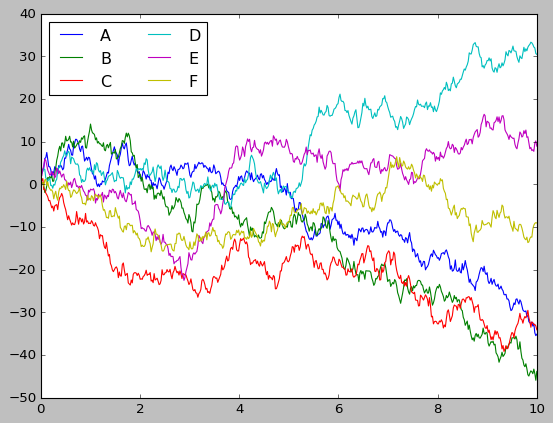

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');
# В результате выполнения этого кода будет создан график с шестью линиями, каждая из которых представляет собой кумулятивную сумму случайных чисел.

Text(0.5, 1.0, 'Крекова')

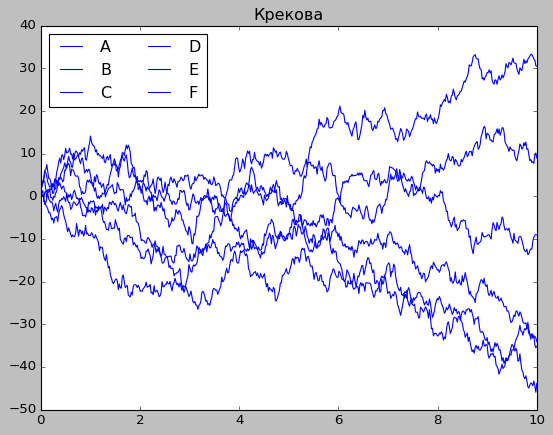

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y, color='blue')
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.title('Крекова')


Хотя результат содержит всю информацию, которую мы хотели бы передать, он сделан не слишком эстетично и даже выглядит немного старомодно в контексте визуализации данных XXI века.

Теперь давайте посмотрим, как это работает с Seaborn. Как мы увидим, Seaborn имеет много собственных высокоуровневых процедур построения графиков, но он также может перезаписывать параметры Matplotlib по умолчанию и, в свою очередь, заставлять даже простые скрипты Matplotlib выдавать значительно более качественный вывод. Мы можем задать стиль, вызвав set()метод Seaborn. По соглашению Seaborn импортируется как sns:

In [ ]:
import seaborn as sns
sns.set() # Этот код предназначен для настройки внешнего вида графиков с использованием библиотеки seaborn в Python.

Теперь давайте повторим те же две строки, что и раньше:


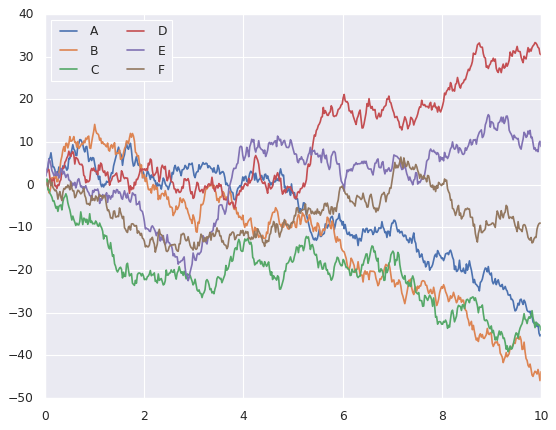

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');
# код остается тем же, seaborn применил свой стиль по умолчанию к графику, улучшив его внешний вид.

Text(0.5, 1.0, 'Крекова')

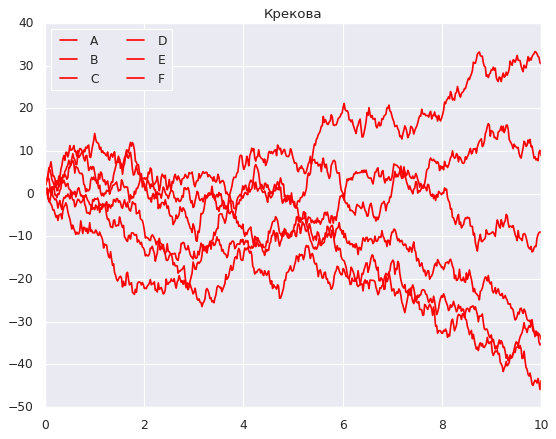

In [ ]:
# same plotting code as above!
plt.plot(x, y, color='red')
plt.legend('ABCDEF', ncol=2, loc='upper left');
plt.title('Крекова')

О, гораздо лучше!

# Изучение участков Сиборн
Основная идея Seaborn заключается в том, что он предоставляет высокоуровневые команды для создания различных типов графиков, полезных для статистического исследования данных и даже для некоторой подгонки статистических моделей.

Давайте рассмотрим несколько наборов данных и типов графиков, доступных в Seaborn. Обратите внимание, что все нижеследующее можно сделать с помощью сырых команд Matplotlib (это, по сути, то, что Seaborn делает под капотом), но API Seaborn гораздо удобнее.

# Гистограммы, KDE и плотности
Часто при визуализации статистических данных все, что вам нужно, это построить гистограммы и совместные распределения переменных. Мы увидели, что это относительно просто в Matplotlib:

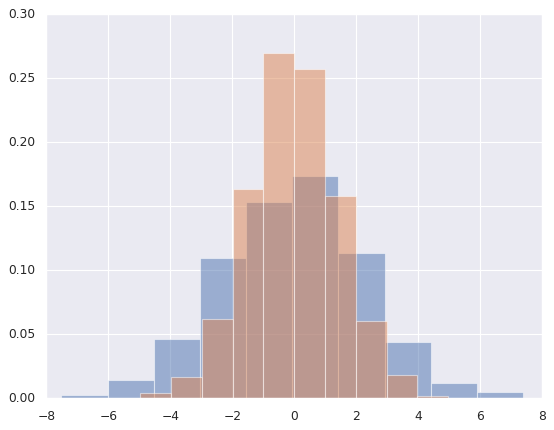

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5, label=col)
    # код генерирует двумерные случайные данные, помещает их в DataFrame библиотеки pandas и затем создает гистограммы для каждой переменной (столбца) в DataFrame с использованием библиотеки matplotlib.

Вместо гистограммы мы можем получить сглаженную оценку распределения, используя оценку плотности ядра, которую Сиборн делает с помощью sns.kdeplot:

<ipython-input-32-734b7f217c35>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, label=col)
<ipython-input-32-734b7f217c35>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True, label=col)


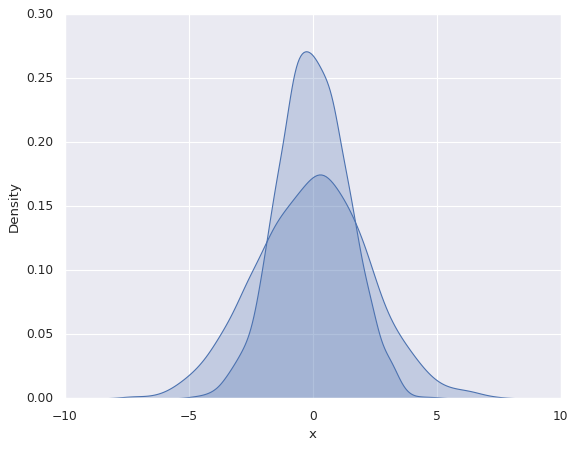

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True, label=col)
    # Этот код использует библиотеку seaborn (sns) для создания графиков Kernel Density Estimation (KDE) для данных, хранящихся в DataFrame библиотеки pandas под названием data.
    # Цикл for перебирает два столбца этого DataFrame, названные 'x' и 'y', и для каждого столбца строит график KDE.

Гистограммы и KDE можно объединить с помощью distplot:

<ipython-input-33-f74e07db4076>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'])
<ipython-input-33-f74e07db4076>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y']);


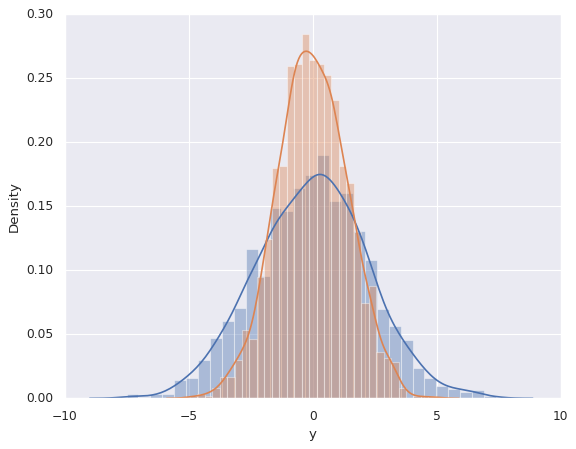

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y']);
# Код создает два графика распределения — один для переменной 'x' и один для переменной 'y'. Это позволяет визуально оценить, как распределены данные в каждом из этих столбцов.

Если мы передадим полный двумерный набор данных в kdeplot, мы получим двумерную визуализацию данных:

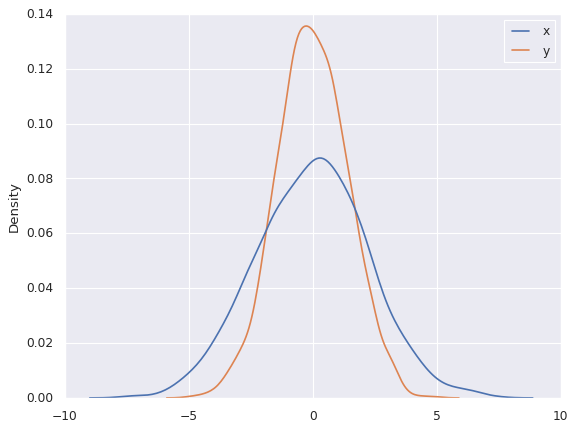

In [ ]:
sns.kdeplot(data);

Мы можем увидеть совместное распределение и маргинальные распределения вместе, используя sns.jointplot. Для этого графика мы установим стиль на белый фон:

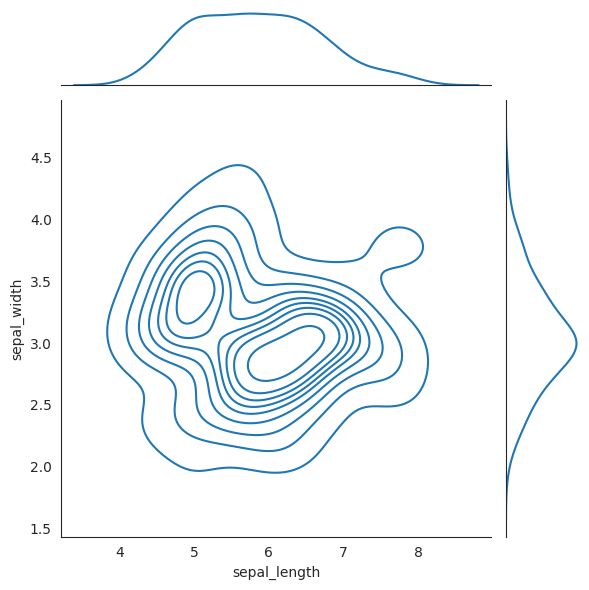

In [ ]:
import seaborn as sns
import pandas as pd # Убедитесь, что pandas импортирован
data = sns.load_dataset('iris')

with sns.axes_style('white'):
    sns.jointplot(x="sepal_length", y="sepal_width", data=data, kind='kde') #Используйте имена столбцов из набора данных

Существуют и другие параметры, которые можно передать jointplot— например, вместо этого мы можем использовать гексагональную гистограмму:

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


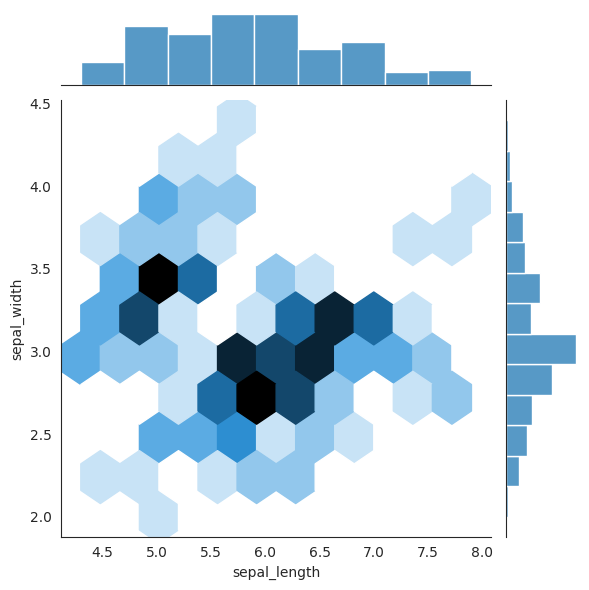

In [ ]:
import seaborn as sns
import pandas as pd

try:
    data = sns.load_dataset('iris')
except Exception as e:
    print(f"Error loading dataset: {e}")
    data = None

if data is not None:
    print(data.head())

    try:
        with sns.axes_style('white'):
            sns.jointplot(x="sepal_length", y="sepal_width", data=data, kind='hex')
    except TypeError as e:
        print(f"TypeError during jointplot creation: {e}")
        print("Check if your data types are appropriate for jointplot.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Парные участки
При обобщении совместных графиков на наборы данных большего размера вы получаете парные графики . Это очень полезно для изучения корреляций между многомерными данными, когда вы хотите построить график всех пар значений относительно друг друга.

Мы продемонстрируем это на примере известного набора данных Iris, в котором приведены размеры лепестков и чашелистиков трех видов ирисов:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Визуализировать многомерные отношения между образцами так же просто, как вызвать sns.pairplot:

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


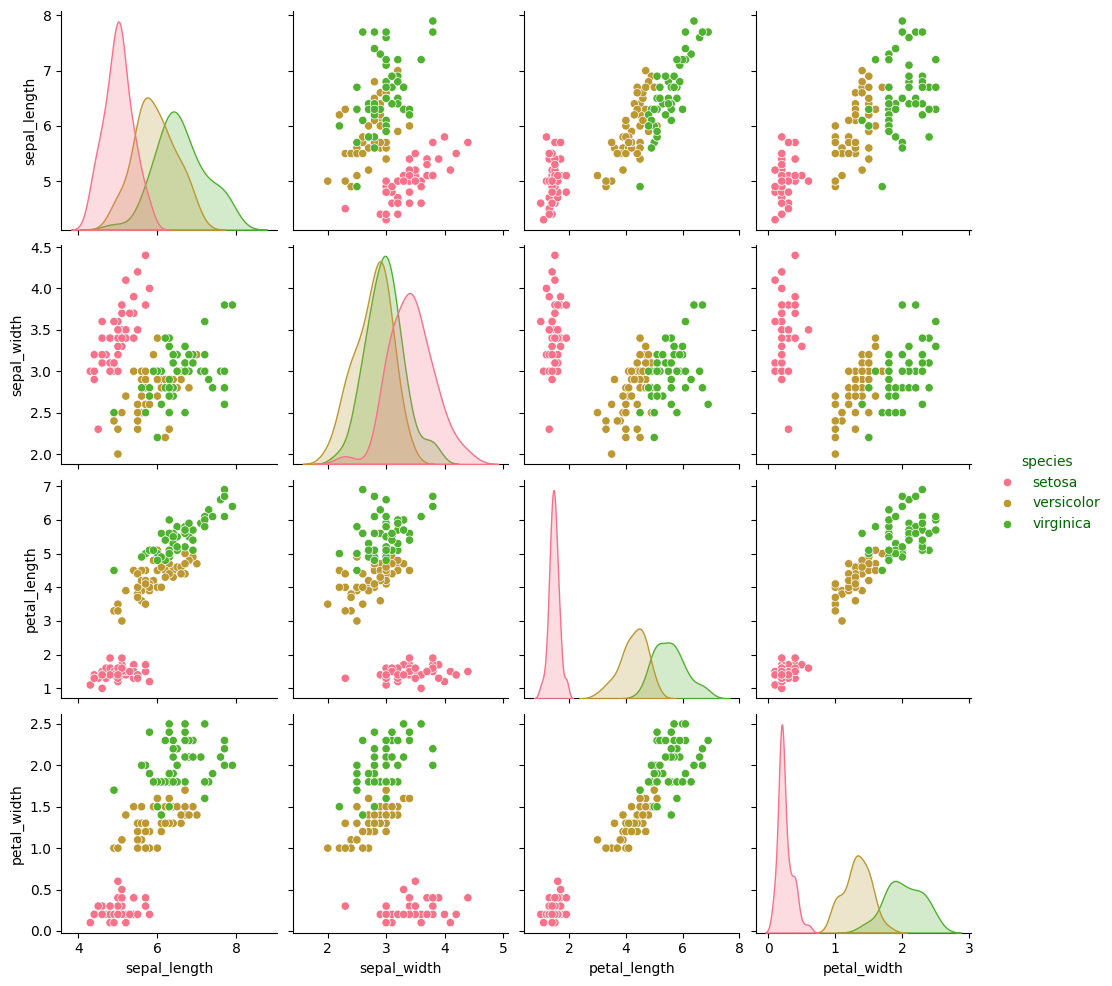

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);


# Фасетные гистограммы
Иногда лучший способ просмотра данных — гистограммы подмножеств. Seaborn FacetGridделает это чрезвычайно простым. Мы рассмотрим некоторые данные, которые показывают сумму, которую персонал ресторана получает в виде чаевых, на основе различных показателей:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


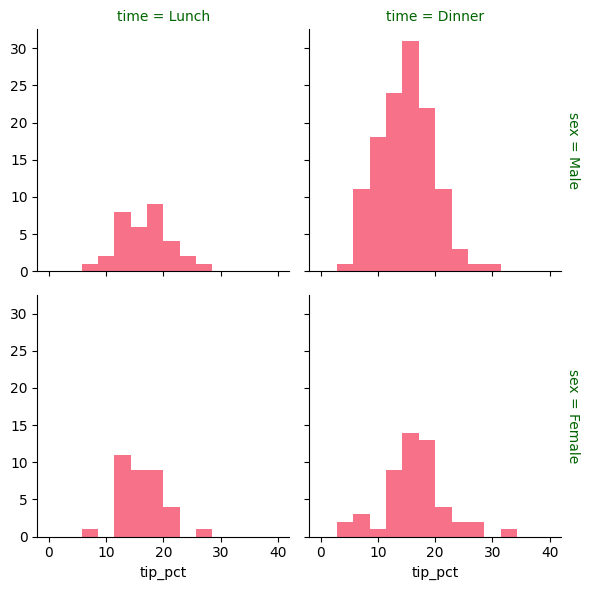

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

# Calculate tip percentage
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

# Create the FacetGrid
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

# Map the histogram
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

plt.show()

# Факторные графики
Факторные графики также могут быть полезны для такого рода визуализации. Это позволяет вам просматривать распределение параметра в пределах интервалов, определенных любым другим параметром:

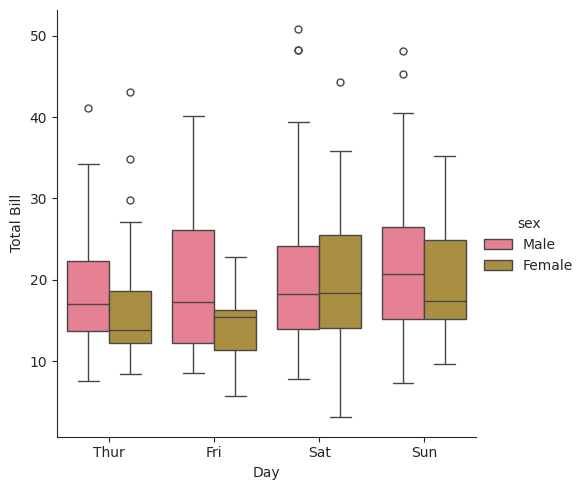

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset('tips')

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box") #factorplot is deprecated
    g.set_axis_labels("Day", "Total Bill")
    plt.show()
    #Этот код Python использует библиотеки Seaborn и Matplotlib для создания и отображения диаграммы, визуализирующей взаимосвязь между несколькими переменными в наборе данных «tips»

# Совместные распределения
Подобно парному графику, который мы рассматривали ранее, мы можем использовать его sns.jointplotдля отображения совместного распределения между различными наборами данных, а также связанных с ними предельных распределений:

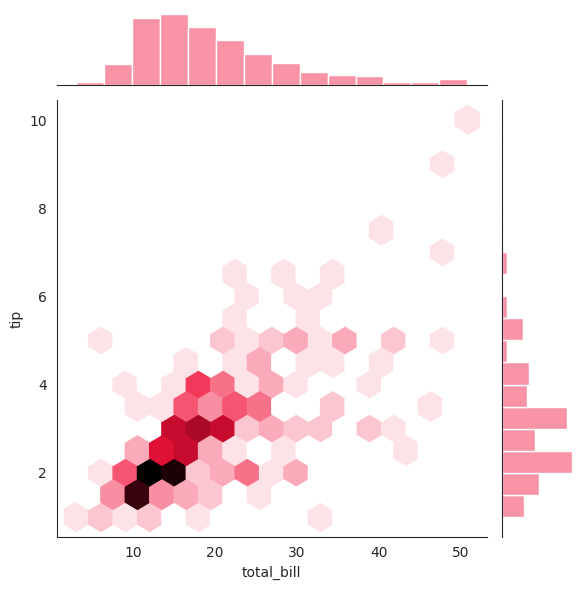

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset (if you haven't already)
tips = sns.load_dataset('tips')

with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')
plt.show()
#Гексагональное разбиение эффективно визуализирует плотность точек данных, упрощая выявление закономерностей и корреляций, особенно в регионах с большим количеством перекрывающихся точек данных.

Совместный график может даже выполнять некоторую автоматическую оценку плотности ядра и регрессию:

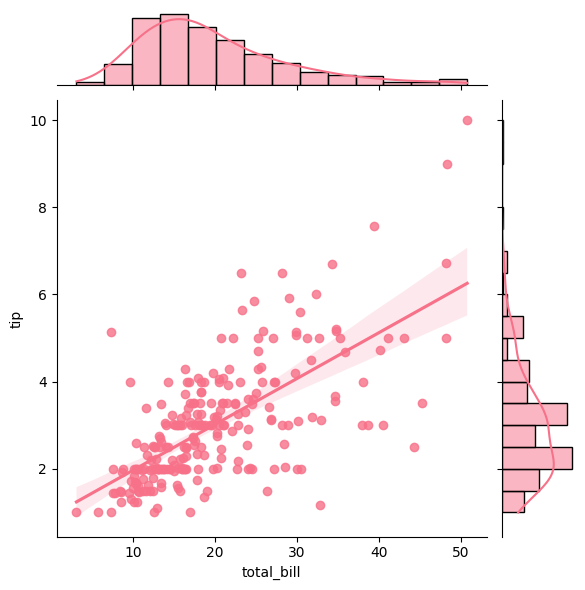

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset (if you haven't already)
tips = sns.load_dataset('tips')

sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg')
plt.show()
#код Python использует библиотеки Seaborn и Matplotlib для создания и отображения совместного графика, который визуально представляет связь между столбцами 'total_bill' и 'tip' в наборе данных 'tips'.

# Барные диаграммы
Временные ряды можно построить с помощью sns.factorplot. В следующем примере мы будем использовать данные Planets, которые мы впервые увидели в разделе Агрегация и группировка :




In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


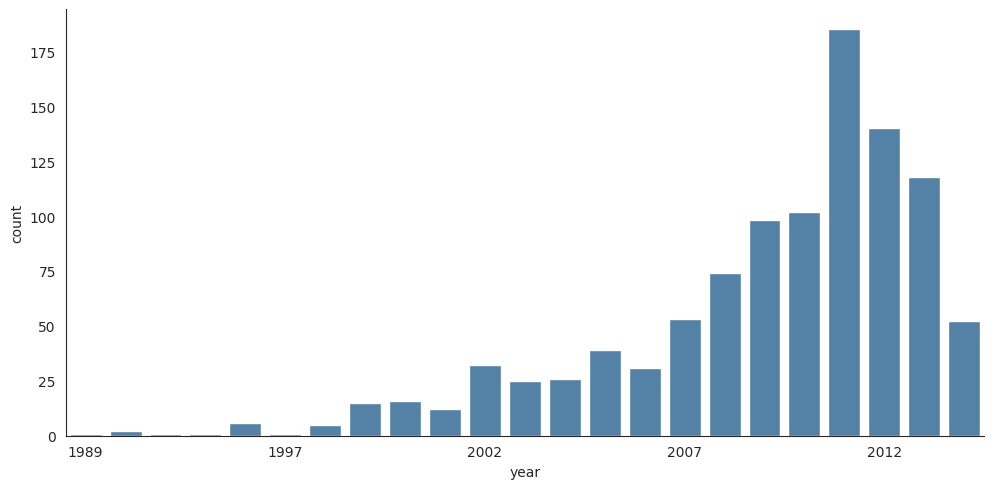

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the planets dataset
planets = sns.load_dataset('planets')

with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)
    plt.show()
    #Этот код Python использует библиотеки Seaborn и Matplotlib для генерации и отображения графика количества, визуализирующего количество планет, открываемых каждый год в наборе данных «планеты».

Мы можем узнать больше, рассмотрев метод открытия каждой из этих планет:

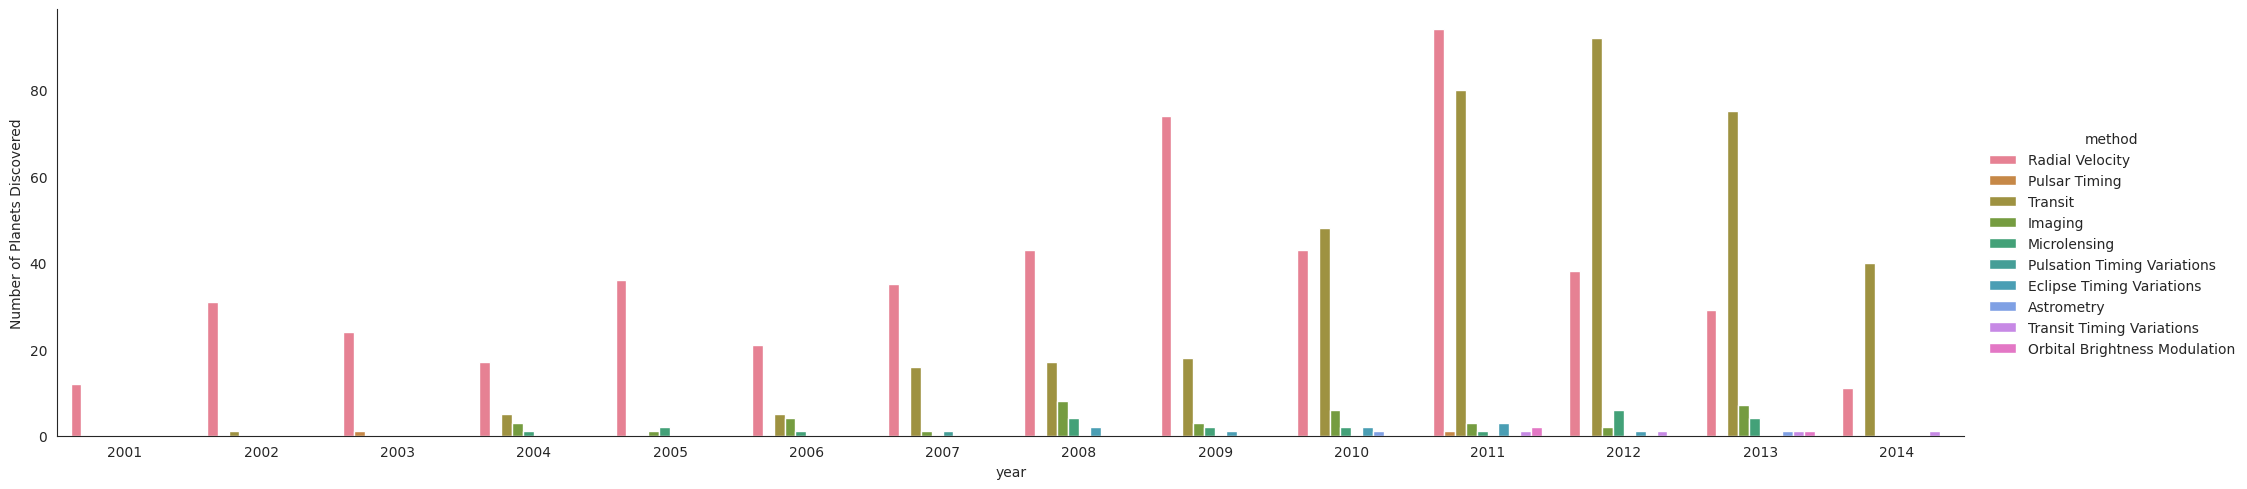

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the planets dataset
planets = sns.load_dataset('planets')

with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')
    plt.show()
# код Python генерирует график категориального количества с использованием библиотек Seaborn и Matplotlib, визуализируя количество планет, открытых каждый год между 2001 и 2014 годами, категоризированных по методу открытия.

# Пример: изучение времени финиша на марафонской дистанции
Здесь мы рассмотрим использование Seaborn для визуализации и понимания результатов марафона. Я собрал данные из источников в Интернете, собрал их, удалил любую идентифицирующую информацию и выложил на GitHub, где их можно скачать (если вы заинтересованы в использовании Python для веб-скрапинга, я бы порекомендовал Web Scraping with Python Райана Митчелла). Начнем с загрузки данных из Интернета и загрузки их в Pandas:

In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [ ]:
import pandas as pd
import os

csv_file = 'marathon-data.csv'  # Store the filename in a variable

try:
    # Check if the file exists *before* attempting to read it
    if not os.path.isfile(csv_file):  # More precise check: is it a file?
        raise FileNotFoundError(f"The file '{csv_file}' was not found.")

    data = pd.read_csv(csv_file)
    print(data.head())  # Print the first few rows to verify the data

except FileNotFoundError as e:
    print(f"Error: {e} Make sure the file is in the correct directory and that the filename is correct.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{csv_file}' is empty or contains no data rows.")
except pd.errors.ParserError as e:
    print(f"Error: There was an issue parsing the CSV file. Check the file format, delimiters, and data types.\nDetails: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Error: The file 'marathon-data.csv' was not found. Make sure the file is in the correct directory and that the filename is correct.


По умолчанию Pandas загружает столбцы времени как строки Python (тип object); это можно увидеть, посмотрев на dtypesатрибут DataFrame:

In [ ]:
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


Давайте исправим это, предоставив конвертер времени:

In [ ]:
import pandas as pd
import datetime

def convert_time(s):
    try:
        h, m, s = map(int, s.split(':'))
        return datetime.timedelta(hours=h, minutes=m, seconds=s)
    except ValueError:
        return None  # Or some other appropriate value for missing/invalid data

try:
    data = pd.read_csv('marathon-data.csv',
                       converters={'split':convert_time, 'final':convert_time})
    print(data.head())
except FileNotFoundError:
    print("Error: The file 'marathon-data.csv' was not found. Please check the file path.")
except ValueError as e:
    print(f"Error converting time values: {e}. Check the format of 'split' and 'final' columns in marathon-data.csv.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: The file 'marathon-data.csv' was not found. Please check the file path.


In [ ]:
data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


Чтобы получить представление о том, как выглядят данные, мы можем построить график a jointplotпо данным:

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a Pandas DataFrame that already exists and contains 'split_sec' and 'final_sec' columns

try:
    # Check data types
    print("Data types of 'split_sec':", data['split_sec'].dtype)
    print("Data types of 'final_sec':", data['final_sec'].dtype)

    # Check for NaN or infinite values
    print("NaN values in 'split_sec':", data['split_sec'].isnull().sum())
    print("NaN values in 'final_sec':", data['final_sec'].isnull().sum())
    print("Infinite values in 'split_sec':", np.isinf(data['split_sec']).sum())
    print("Infinite values in 'final_sec':", np.isinf(data['final_sec']).sum())


    with sns.axes_style('white'):
        g = sns.jointplot(x=data["split_sec"], y=data["final_sec"], kind='hex')
        g.ax_joint.plot(np.linspace(4000, 16000),
                        np.linspace(8000, 32000), ':k')
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")



An error occurred: 'split_sec'


KeyError: 'gender'.  Please ensure the column ''gender'' exists in the DataFrame and is spelled correctly.


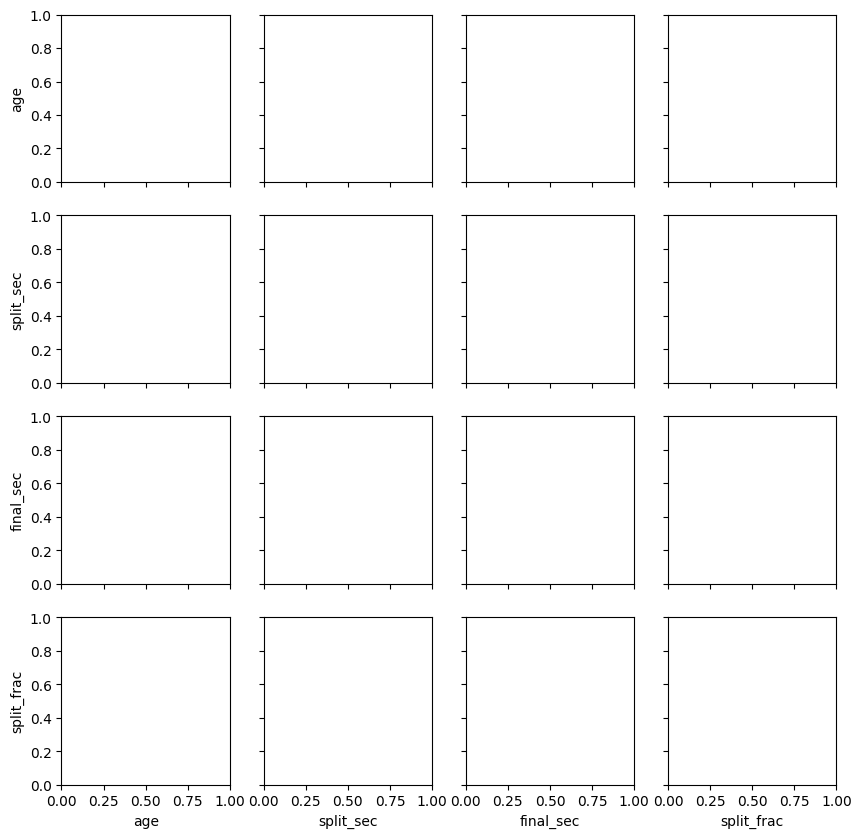

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported


try:
    g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                     hue='gender', palette='RdBu_r')
    g.map_diag(sns.histplot) #Use histplot for diagonal elements
    g.map_offdiag(plt.scatter, alpha=0.8)  # Use scatter plot for off-diagonal elements
    g.add_legend()
    plt.show()  #Ensure plot is displayed


except KeyError as e:
    print(f"KeyError: {e}.  Please ensure the column '{e}' exists in the DataFrame and is spelled correctly.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Похоже, что дробная часть не коррелирует конкретно с возрастом, но коррелирует с конечным временем: у более быстрых бегунов, как правило, более равномерные дроби во времени марафона. (Здесь мы видим, что Seaborn не является панацеей от проблем Matplotlib, когда дело касается стилей графиков: в частности, метки оси X перекрываются. Однако, поскольку вывод представляет собой простой график Matplotlib, методы в разделе « Настройка отметок» можно использовать для корректировки таких вещей, если это необходимо.)

Разница между мужчинами и женщинами здесь интересна. Давайте посмотрим на гистограмму дробных долей для этих двух групп:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with 'split_frac' and 'gender' columns.
# 'gender' column contains 'M' and 'W' values

try:
    # Handle potential NaN values in 'split_frac' and ensure gender values are valid
    men_data = data.loc[data['gender'] == 'M', 'split_frac'].dropna()
    women_data = data.loc[data['gender'] == 'W', 'split_frac'].dropna()


    if not men_data.empty:
        sns.kdeplot(men_data, label='men', fill=True)  # Use fill=True instead of shade=True
    if not women_data.empty:
        sns.kdeplot(women_data, label='women', fill=True)  # Use fill=True instead of shade=True


    plt.xlabel('split_frac')
    plt.ylabel('Density')  # Add y-axis label for clarity
    plt.title('Distribution of split_frac by Gender')  # Add title for context
    plt.legend()  # Show legend
    plt.show()

except KeyError as e:
    print(f"KeyError: {e}. Please ensure the column '{e}' exists in the DataFrame and is spelled correctly.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


KeyError: 'gender'. Please ensure the column ''gender'' exists in the DataFrame and is spelled correctly.
